Импортируем все библиотеки и считываем файл

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

**1 пункт**

In [2]:
df= pd.read_csv('drivers2.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1237.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0
...,...,...,...,...,...,...,...,...,...,...
1094,2016-12-22 19:04:00,2016-12-22 19:50:00,Business,Unknown Location,Lahore,14.0,Meeting,46.0,18.260870,3787.0
1095,2016-12-22 21:41:00,2016-12-22 21:53:00,Business,Lahore,Lahore,2.1,Meal/Entertain,12.0,10.500000,1237.0
1096,2016-12-22 23:27:00,2016-12-22 23:32:00,Business,Lahore,Lahore,2.1,Customer Visit,5.0,25.200000,712.0
1097,2016-12-23 09:21:00,2016-12-23 09:41:00,Business,Lahore,Lahore,3.0,Meeting,20.0,9.000000,1836.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1099 non-null   object 
 1   END_DATE*    1099 non-null   object 
 2   CATEGORY*    1099 non-null   object 
 3   START*       1099 non-null   object 
 4   STOP*        1099 non-null   object 
 5   MILES*       1099 non-null   float64
 6   PURPOSE*     598 non-null    object 
 7   time         1099 non-null   float64
 8   speed        1099 non-null   float64
 9   price        1099 non-null   float64
dtypes: float64(4), object(6)
memory usage: 86.0+ KB


In [4]:
df.describe()

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,MILES*,time,speed,price
count,1099.000000,1099.000000,1099.000000,1099.000000
mean,10.803094,23.300273,inf,2085.929936
std,22.044580,27.745836,NaN,2084.368402
min,0.500000,0.000000,3.917355,337.000000
25%,2.900000,10.000000,15.346667,1087.000000
50%,6.000000,16.000000,21.333333,1539.000000
75%,10.500000,27.000000,28.915033,2365.500000
max,310.300000,336.000000,inf,25569.000000


В описательной статистике данных встречаются странные значения, которые стоит рассмотреть отдельно. также можно примести названия столбцов к стандартному виду.

In [5]:

'''
Аргументация обработки аномальных значений в столбце speed:
1. ЗАМЕНА inf НА NaN:
Бесконечные значения (inf) возникают при делении на ноль или очень малые числа.
Физическая интерпретация: бесконечная скорость означает мгновенное перемещение,
что невозможно в реальности. Это ошибка данных.

2. УДАЛЕНИЕ СТРОК С NaN В SPEED:
NaN в стандартном отклонении свидетельствует о численной нестабильности - 
когда в данных присутствуют inf значения, статистические расчеты становятся невозможными.
Удаление необходимо потому что:
- Машинное обучение и статистический анализ не работают с inf/NaN
- Эти значения искажают любые агрегированные показатели
- Они являются артефактами ошибок в исходных данных (нулевое время поездки)
'''

df_clean = df.copy()
# Замена inf на NaN для последующей корректной обработки
df_clean['speed'] = df_clean['speed'].replace([np.inf, -np.inf], np.nan)

# Удаление строк с NaN (включая преобразованные из inf)
df_clean = df_clean.dropna(subset=['speed'])

print(f"Удалено {len(df) - len(df_clean)} записей с некорректной скоростью")
print("Теперь статистика скорости физически осмысленна:")
print(df_clean['speed'].describe())

Удалено 4 записей с некорректной скоростью
Теперь статистика скорости физически осмысленна:
count    1095.000000
mean       27.379427
std        44.159739
min         3.917355
25%        15.333333
50%        21.333333
75%        28.875000
max       906.000000
Name: speed, dtype: float64


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1095 non-null   object 
 1   END_DATE*    1095 non-null   object 
 2   CATEGORY*    1095 non-null   object 
 3   START*       1095 non-null   object 
 4   STOP*        1095 non-null   object 
 5   MILES*       1095 non-null   float64
 6   PURPOSE*     598 non-null    object 
 7   time         1095 non-null   float64
 8   speed        1095 non-null   float64
 9   price        1095 non-null   float64
dtypes: float64(4), object(6)
memory usage: 94.1+ KB


In [7]:
df_clean.describe()

,MILES*,time,speed,price
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,10.774064,23.385388,27.379427,2092.296804
std,22.009426,27.760654,44.159739,2085.504438
min,0.500000,1.000000,3.917355,412.000000
25%,2.900000,10.000000,15.333333,1087.000000
50%,6.000000,16.000000,21.333333,1539.000000
75%,10.500000,27.500000,28.875000,2401.000000
max,310.300000,336.000000,906.000000,25569.000000


Теперь мы видим, что датафрейм содержит адекватные данные, с которыми можно комфортно работать при последующей обработке

In [8]:
#приводим названия столбцов к нормальным значениям
df_clean.columns = df_clean.columns.str.lower().str.replace('*', '')

#проверяем результат
print("обновленные названия столбцов:")
print(df_clean.columns.tolist())
print("\nинформация о данных с новыми названиями столбцов:")
print(df_clean.info())

обновленные названия столбцов:
['start_date', 'end_date', 'category', 'start', 'stop', 'miles', 'purpose', 'time', 'speed', 'price']

информация о данных с новыми названиями столбцов:
<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  1095 non-null   object 
 1   end_date    1095 non-null   object 
 2   category    1095 non-null   object 
 3   start       1095 non-null   object 
 4   stop        1095 non-null   object 
 5   miles       1095 non-null   float64
 6   purpose     598 non-null    object 
 7   time        1095 non-null   float64
 8   speed       1095 non-null   float64
 9   price       1095 non-null   float64
dtypes: float64(4), object(6)
memory usage: 94.1+ KB
None


**2 Пункт**

матрица диаграмм рассеяния для числовых признаков:


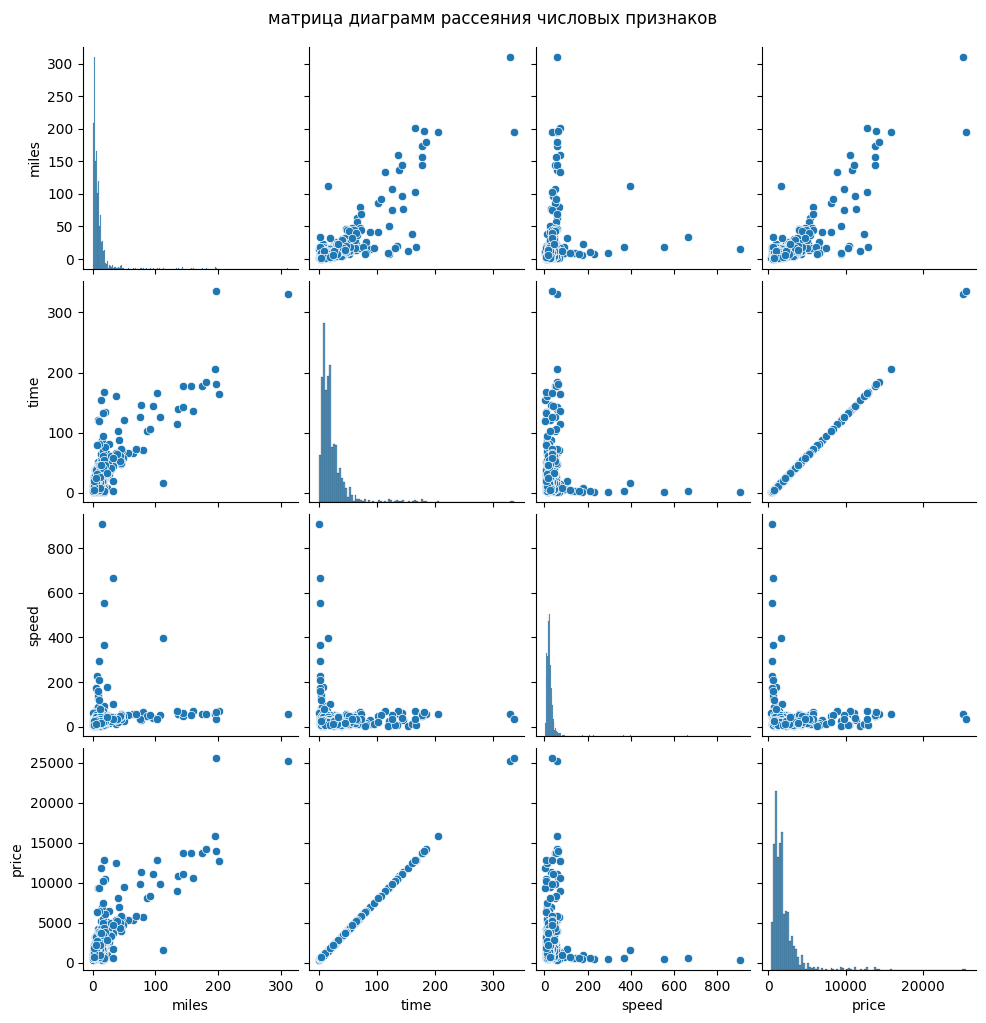

In [9]:
#строим матрицу диаграмм рассеяния для всех числовых признаков
numerical_features = ['miles', 'time', 'speed', 'price']

print("матрица диаграмм рассеяния для числовых признаков:")
sns.pairplot(df_clean[numerical_features])
plt.suptitle('матрица диаграмм рассеяния числовых признаков', y=1.02)
plt.show()

Как мы можем видеть, существует линейная, значимая зависимость между переменными price и time, а также менее значимая, но видимая между price и miles, time и miles что логично для принципа работы такси. также видна обратная связь между speed и miles, speed и price. В среднем, водители на более длинных расстояниях едут медленнее, как и в поездках за более высокую цену, где пассажир платит за комфорт.

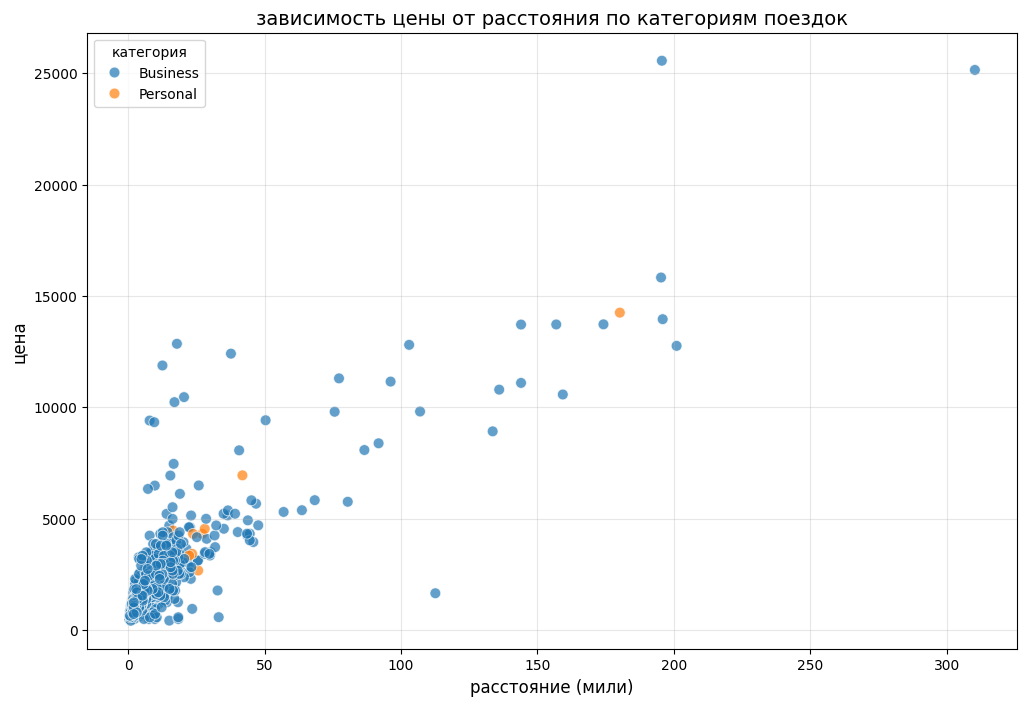

In [10]:
#диаграмма рассеяния по категориям (category)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean, x='miles', y='price', hue='category', alpha=0.7, s=60)
plt.title('зависимость цены от расстояния по категориям поездок', fontsize=14)
plt.xlabel('расстояние (мили)', fontsize=12)
plt.ylabel('цена', fontsize=12)
plt.legend(title='категория')
plt.grid(True, alpha=0.3)
plt.show()

На этом графике мы вдиим, мы для обеих категорий существует значимая взаимосвязь между пройденным расстоянием и ценой. 

**3 Пункт**

количество наблюдений: 1095
оптимальное количество бинов по правилу стерджеса: 11


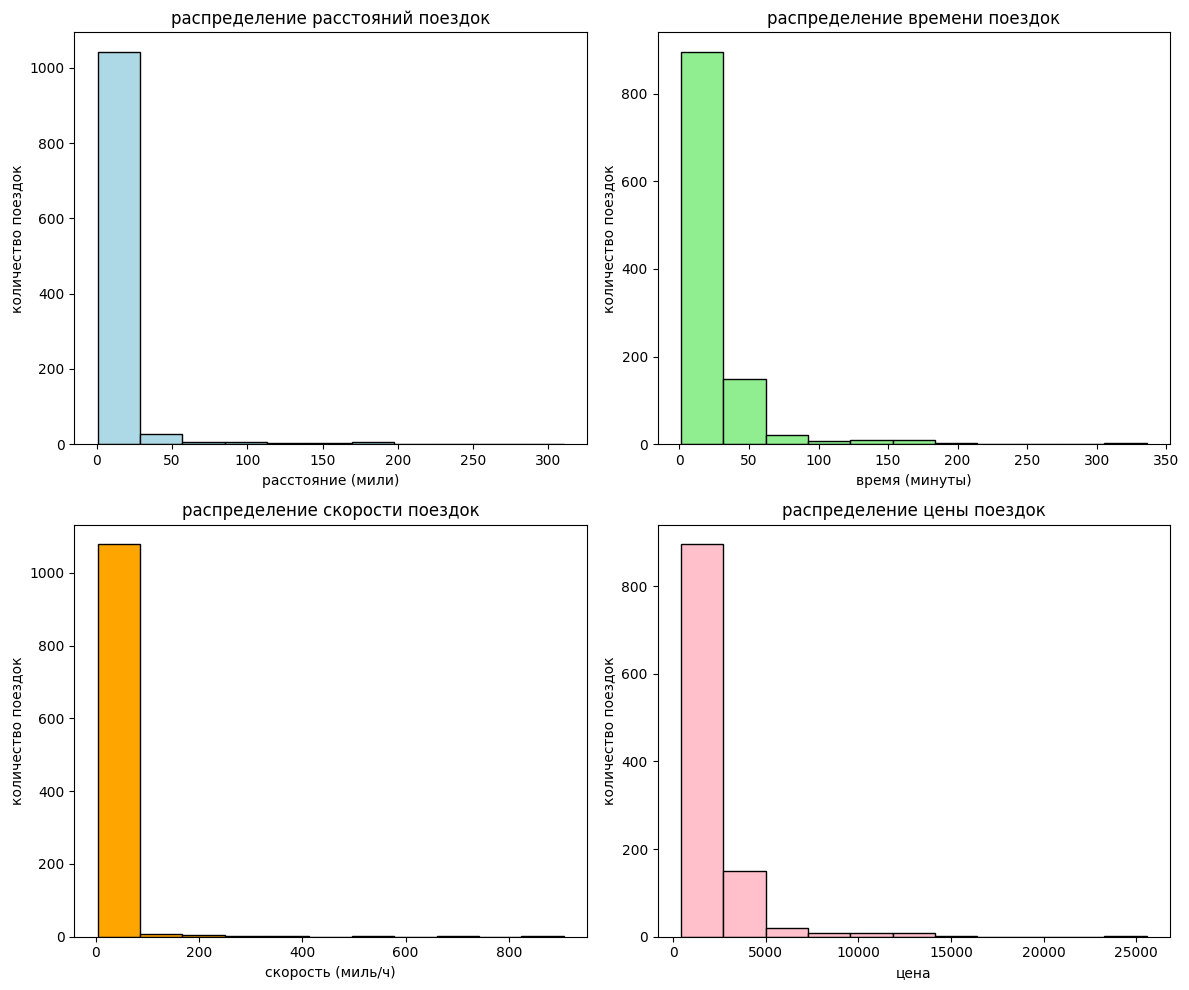

In [15]:
#строим простые гистограммы для каждого числового признака
#используем правило стерджеса для определения оптимального количества бинов

#определяем оптимальное количество бинов
n = len(df_clean)
optimal_bins = int(1 + 3.322 * np.log10(n))
print(f"количество наблюдений: {n}")
print(f"оптимальное количество бинов по правилу стерджеса: {optimal_bins}")

#правило стерджеса помогает выбрать оптимальное количество интервалов
#для гистограммы, чтобы балансировать между детализацией и читаемостью

#создаем фигуру с 4 подграфиками
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#гистограмма для расстояния (miles)
axes[0,0].hist(df_clean['miles'], bins=optimal_bins, color='lightblue', edgecolor='black')
axes[0,0].set_title('распределение расстояний поездок')
axes[0,0].set_xlabel('расстояние (мили)')
axes[0,0].set_ylabel('количество поездок')

#гистограмма для времени (time)
axes[0,1].hist(df_clean['time'], bins=optimal_bins, color='lightgreen', edgecolor='black')
axes[0,1].set_title('распределение времени поездок')
axes[0,1].set_xlabel('время (минуты)')
axes[0,1].set_ylabel('количество поездок')


#гистограмма для скорости (speed)
axes[1,0].hist(df_clean['speed'], bins=optimal_bins, color='orange', edgecolor='black')
axes[1,0].set_title('распределение скорости поездок')
axes[1,0].set_xlabel('скорость (миль/ч)')
axes[1,0].set_ylabel('количество поездок')


#гистограмма для цены (price)
axes[1,1].hist(df_clean['price'], bins=optimal_bins, color='pink', edgecolor='black')
axes[1,1].set_title('распределение цены поездок')
axes[1,1].set_xlabel('цена')
axes[1,1].set_ylabel('количество поездок')


plt.tight_layout()
plt.show()

Можно заметить, что у большинства графиков большая часть значений будет будет располагаться вначале распределения. Явная ассиметрия распределения часто встречатся у подобных признаков. Например, логично, что большинство водителей не будет ездить со скоростью >200 км/ч, это будут очень редкие выбросы.

**4 пункт**

In [19]:
#исследуем взаимосвязи между переменными с помощью корреляции и ковариации

#вычисляем матрицу корреляции пирсона
correlation_matrix = df_clean[['miles', 'time', 'speed', 'price']].corr()
print("матрица корреляции пирсона:")
print(correlation_matrix)
print("корреляция показывает силу и направление линейной связи между переменными")
print("значения от -1 до 1, где 1 - сильная прямая связь, -1 - сильная обратная связь, 0 - отсутствие связи")

матрица корреляции пирсона:
          miles      time     speed     price
miles  1.000000  0.849977  0.192600  0.850889
time   0.849977  1.000000  0.005034  0.999998
speed  0.192600  0.005034  1.000000  0.005651
price  0.850889  0.999998  0.005651  1.000000
корреляция показывает силу и направление линейной связи между переменными
значения от -1 до 1, где 1 - сильная прямая связь, -1 - сильная обратная связь, 0 - отсутствие связи


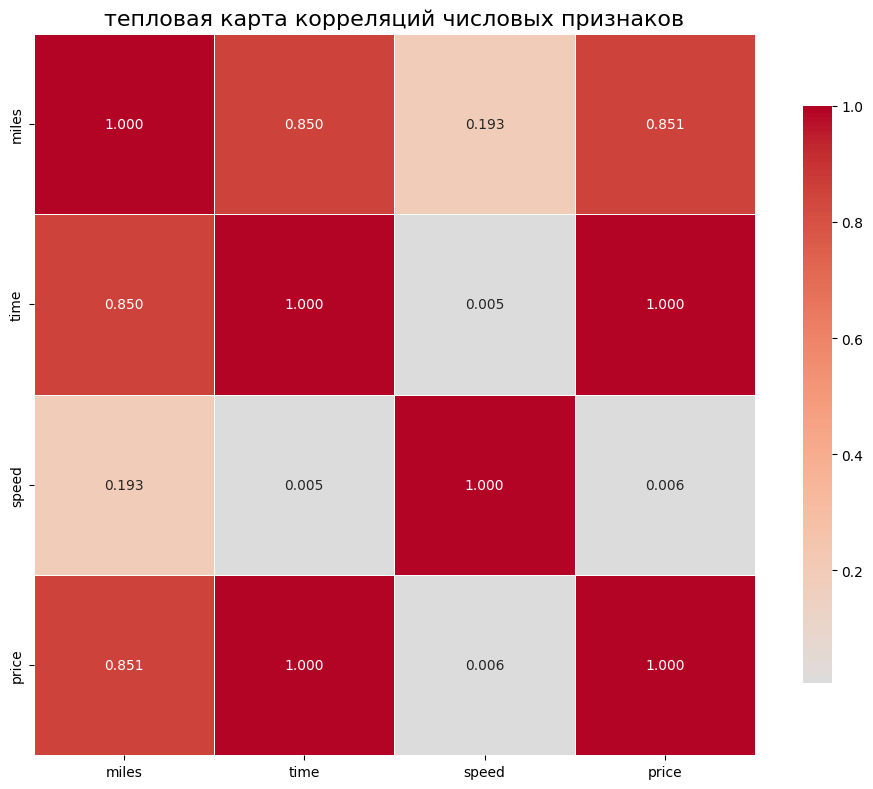

матрица ковариаций:
              miles          time        speed         price
miles    484.414811    519.332857   187.193450  3.905647e+04
time     519.332857    770.653900     6.170935  5.789488e+04
speed    187.193450      6.170935  1950.082519  5.204055e+02
price  39056.466480  57894.879112   520.405543  4.349329e+06


In [58]:
#строим тепловую карту корреляции
plt.figure(figsize=(10, 8))

#вычисляем матрицу корреляций для числовых признаков
numerical_features = ['miles', 'time', 'speed', 'price']
correlation_matrix = df_clean[numerical_features].corr()

#создаем тепловую карту с аннотациями
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('тепловая карта корреляций числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()

#вычисляем матрицу ковариаций
covariance_matrix = df_clean[numerical_features].cov()

print("матрица ковариаций:")
print(covariance_matrix)

Тепловая карта показывает силу и направление линейной связи между переменными. Значения корреляции варьируются от -1 до 1, где 1 означает идеальную прямую линейную связь, -1 - идеальную обратную линейную связь, а 0 - отсутствие линейной связи. В нашем случае наблюдается чрезвычайно сильная прямая связь между временем и ценой (0.999998), что практически означает, что эти переменные линейно зависимы - увеличение времени поездки почти всегда сопровождается пропорциональным увеличением стоимости. Также выявлена сильная связь между расстоянием и ценой (0.851) и расстоянием и временем (0.850), что логично - более длинные поездки требуют больше времени и стоят дороже. При этом скорость демонстрирует очень слабые связи со всеми другими переменными (0.193-0.006), что указывает на то, что скорость движения практически не влияет на стоимость поездки в линейной зависимости.

In [21]:
#вычисляем матрицу ковариации
covariance_matrix = df_clean[['miles', 'time', 'speed', 'price']].cov()
print("матрица ковариации:")
print(covariance_matrix)
print("ковариация показывает направление линейной связи между переменными")
print("положительная ковариация - прямая связь, отрицательная - обратная связь")
print("но величина ковариации зависит от масштаба данных, поэтому сложно интерпретировать силу связи")

матрица ковариации:
              miles          time        speed         price
miles    484.414811    519.332857   187.193450  3.905647e+04
time     519.332857    770.653900     6.170935  5.789488e+04
speed    187.193450      6.170935  1950.082519  5.204055e+02
price  39056.466480  57894.879112   520.405543  4.349329e+06
ковариация показывает направление линейной связи между переменными
положительная ковариация - прямая связь, отрицательная - обратная связь
но величина ковариации зависит от масштаба данных, поэтому сложно интерпретировать силу связи


Матрица ковариации показывает направление и степень совместной изменчивости переменных, но в отличие от корреляции, ее значения не нормированы и зависят от масштаба данных. Положительные значения указывают на прямую связь, отрицательные - на обратную. Наибольшая ковариация наблюдается между временем и ценой (57894.88), что подтверждает очень сильную прямую связь - при увеличении времени поездки ее стоимость значительно возрастает. Также высокая ковариация между расстоянием и ценой (39056.47) и расстоянием и временем (519.33). Диагональные элементы представляют дисперсии каждой переменной, где наибольший разброс наблюдается у скорости (1950.08), что объясняется наличием дорогих поездок-выбросов и значительной вариацией скоростей движения. Низкие значения ковариации скорости с другими переменными подтверждают ее слабую связь с основными факторами стоимости поездки.

**5 пункт**

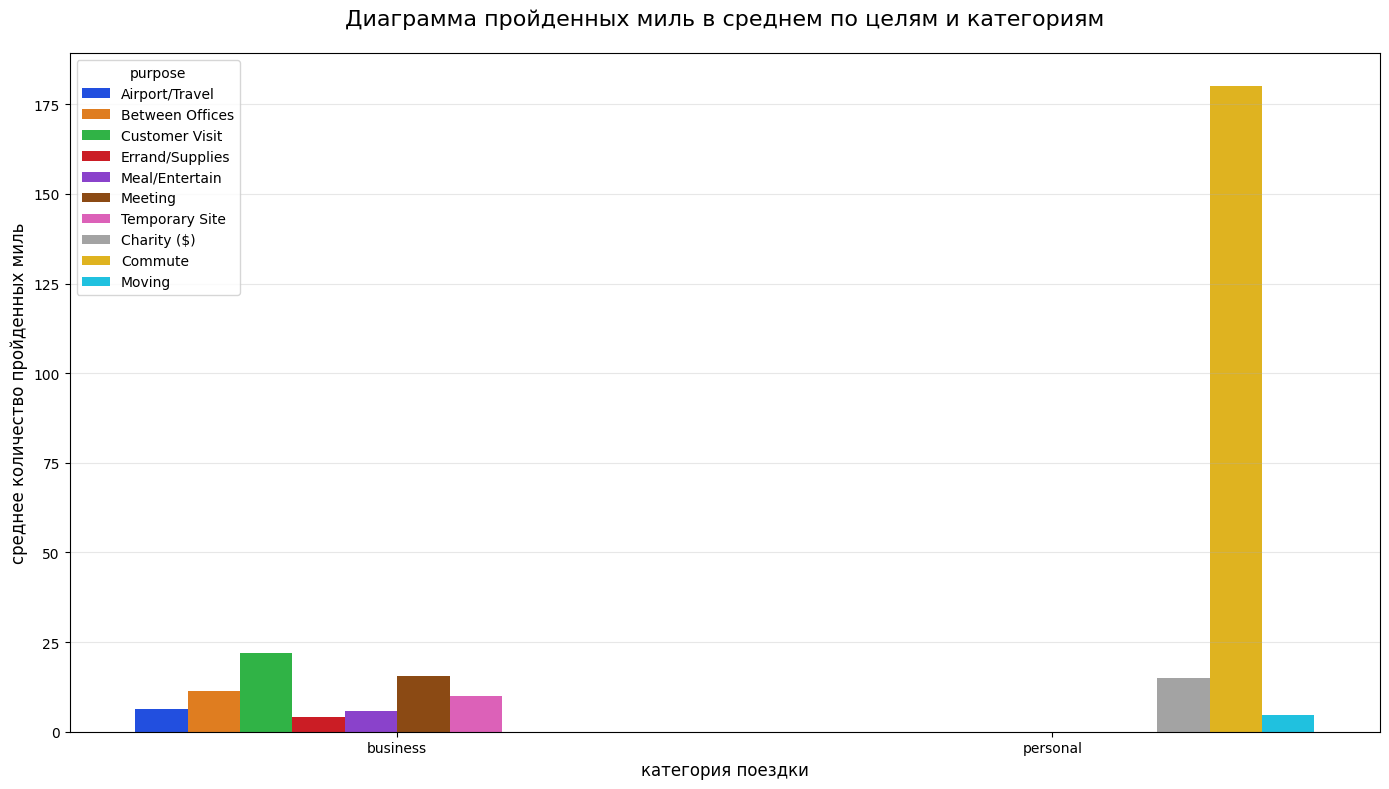

In [56]:
#строим диаграмму согласно первому заданию варианта
plt.figure(figsize=(14, 8))

#группируем данные по category и purpose, вычисляем средние мили
category_purpose_avg = df_clean.groupby(['category', 'purpose'])['miles'].mean().reset_index()

#создаем barplot с указанными параметрами
sns.barplot(data=category_purpose_avg, 
            x='category', 
            y='miles', 
            hue='purpose',
            palette='bright')  #используем яркие цвета

#настраиваем заголовок и подписи
plt.title('Диаграмма пройденных миль в среднем по целям и категориям', fontsize=16, pad=20)
plt.xlabel('категория поездки', fontsize=12)
plt.ylabel('среднее количество пройденных миль', fontsize=12)

#настраиваем легенду (слева сверху)
plt.legend(title='purpose', 
          bbox_to_anchor=(0, 1), 
          loc='upper left',
          frameon=True,
          fancybox=True)

#убеждаемся что на оси x слева business, справа personal
plt.xticks(ticks=[0, 1], labels=['business', 'personal'])

#добавляем сетку для лучшей читаемости
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Видно, что люди, ездящие на бюджетной категории часто используют такси для поездок на работу (Commute). В то время как категорию такси Business чаще используют для деловых поздкок, путешествий, либо встреч (Meeting, Customer visit, Airport). 

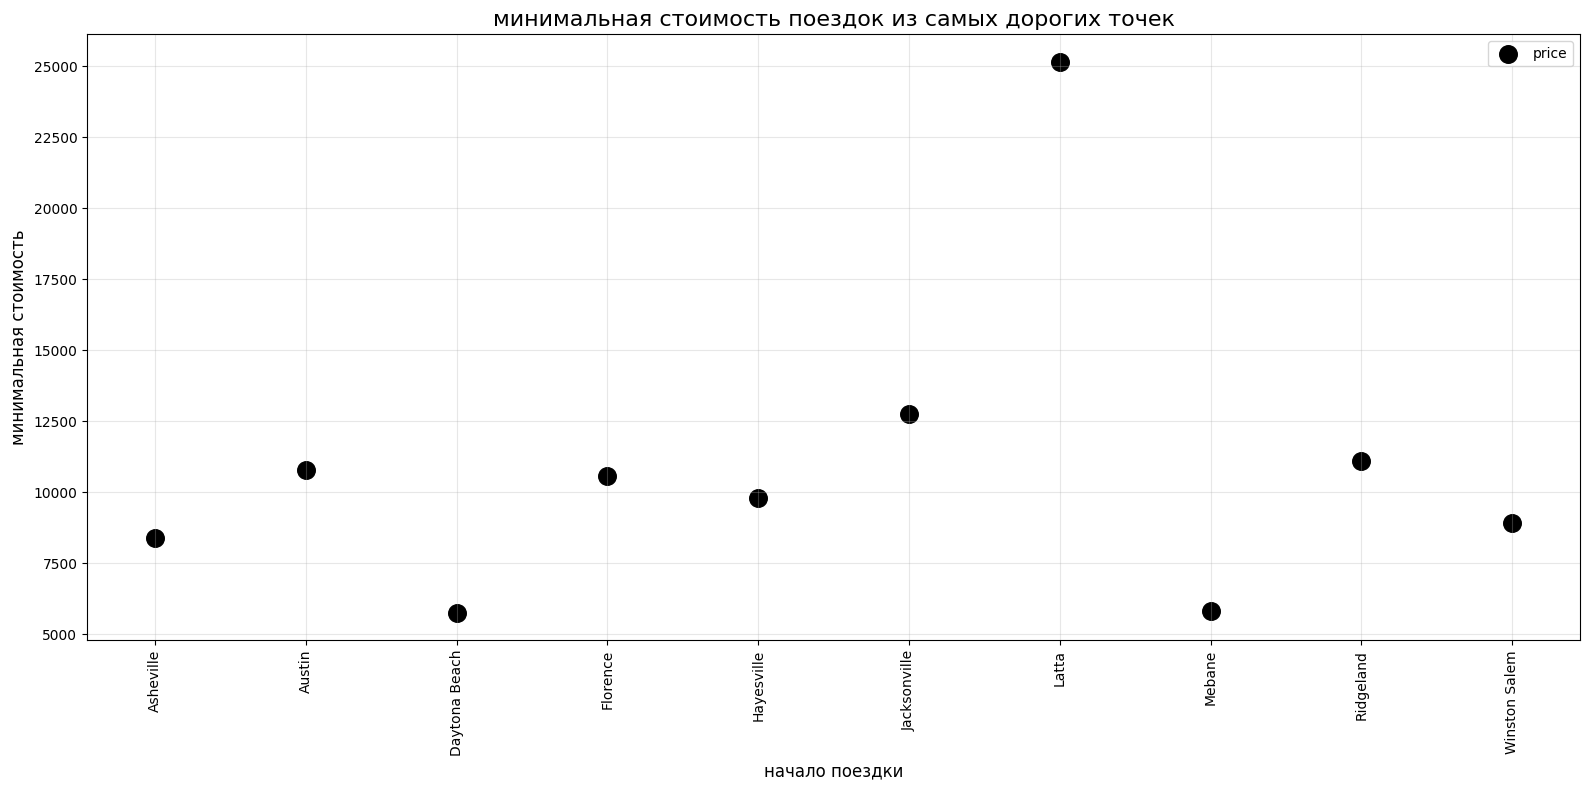

In [32]:
#создание сводной таблицы с минимальной стоимостью по каждой начальной точке
pivot_table = df_clean.pivot_table(
    values='price',      #столбец для агрегации - стоимость поездки
    index='start',       #группировка по начальным точкам маршрутов
    aggfunc='min'        #функция агрегации - поиск минимального значения
)

#фильтрация таблицы - оставляем только строки со стоимостью выше 5000
filtered_prices = pivot_table[pivot_table['price'] > 5000]

#сброс индекса чтобы начальные точки стали отдельным столбцом
filtered_prices_reset = filtered_prices.reset_index()

#построение точечного графика с использованием matplotlib
plt.figure(figsize=(16, 8))

#создание scatter plot с локациями на оси x
plt.scatter(
    filtered_prices_reset['start'],  #ось x - начальные точки поездки
    filtered_prices_reset['price'],  #ось y - минимальная стоимость
    marker='o',                      #маркер в виде круга
    color='black',                   #черный цвет
    s=160,                          #размер маркеров
    label='price'                    #добавляем label для легенды
)

#настройка оформления графика
plt.title('минимальная стоимость поездок из самых дорогих точек', 
          fontsize=16)
plt.xlabel('начало поездки', fontsize=12)
plt.ylabel('минимальная стоимость', fontsize=12)
plt.grid(True, alpha=0.3)

#поворот подписей по оси x для лучшей читаемости
plt.xticks(rotation=90)

#добавляем легенду
plt.legend(loc='upper right')

#оптимизация расположения элементов на графике
plt.tight_layout()
plt.show()

Получилась нагдядный график, показывающий стоимость поездок больше 5000 из 10 самых дорогих точек 

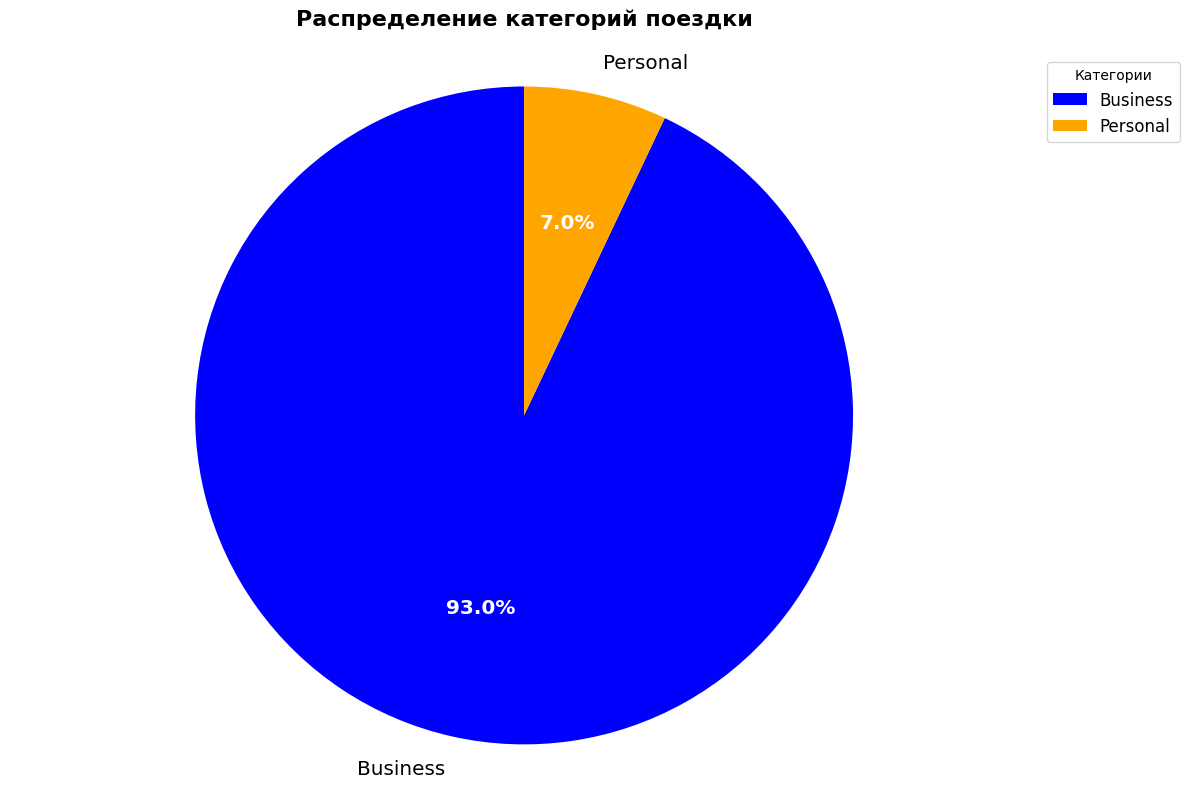

In [37]:
#получение данных о количестве поездок по каждой категории
category_counts = df_clean['category'].value_counts()

#создание круговой диаграммы с использованием matplotlib
plt.figure(figsize=(12, 8))  #размер фигуры 12 на 8

#определение цветов для категорий
colors = ['blue', 'orange']  #business - синий, personal - оранжевый

#построение круговой диаграммы с заданными параметрами
wedges, texts, autotexts = plt.pie(
    category_counts.values,           #данные для диаграммы - количество поездок
    labels=category_counts.index,     #подписи категорий
    autopct='%1.1f%%',               #формат отображения процентов
    startangle=90,                   #начальный угол 90 градусов
    textprops={'size': 'x-large'},   #размер текста
    colors=colors                    #заданные цвета для категорий
)

#улучшение отображения процентов - делаем их более жирными и контрастными
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

#добавление заголовка
plt.title('Распределение категорий поездки', fontsize=16, fontweight='bold', pad=20)

#добавление легенды с настройками согласно методичке
plt.legend(
    wedges,                          #элементы для легенды
    category_counts.index,           #подписи в легенде
    title="Категории",               #заголовок легенды
    fontsize=12,                     #размер шрифта 12
    bbox_to_anchor=(1, 1),          #расположение легенды
    loc="upper left"                 #позиционирование
)

#обеспечение одинакового масштаба по осям для получения круга
plt.axis('equal')

#оптимизация расположения
plt.tight_layout()
plt.show()



Большая часть поездок- бизнес класс. Что возможно связано с тем, что люди с меньшим достатком чаще пользуются общественным транспортом

**Пункт 6**

<Figure size 1200x800 with 0 Axes>

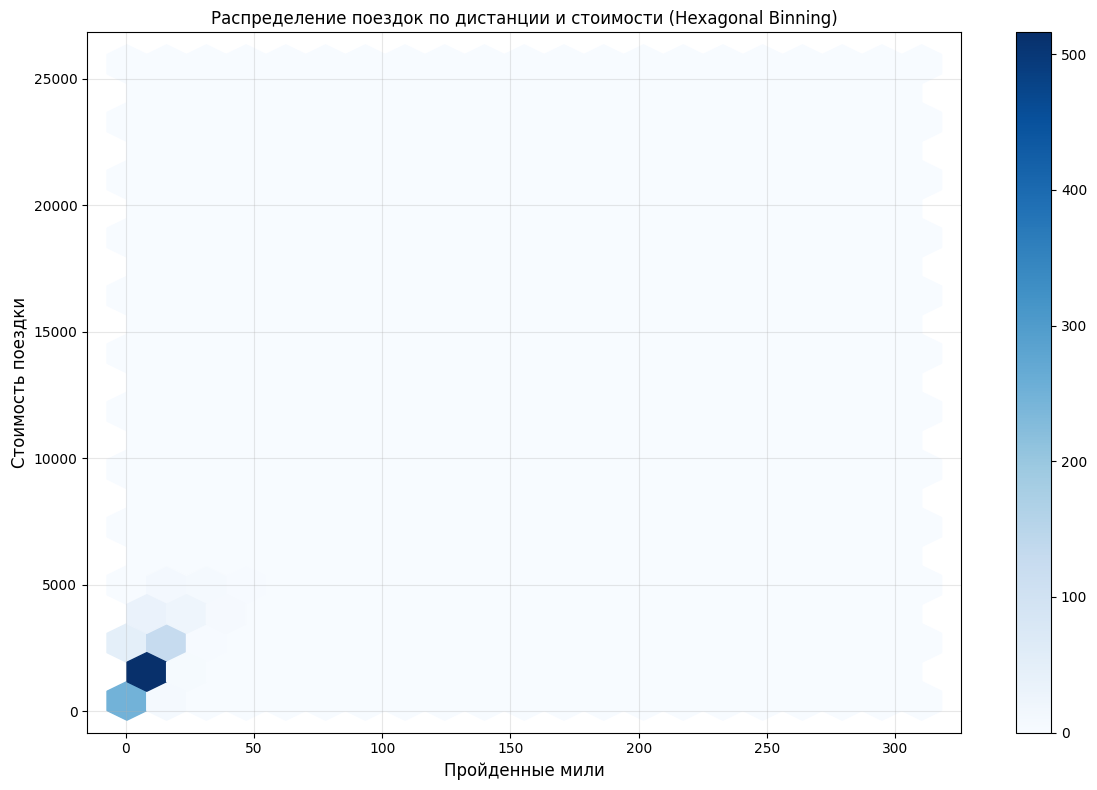

In [43]:
#создание hexagonal binning plot для анализа зависимости между дистанцией и стоимостью поездок
plt.figure(figsize=(12, 8))  #размер фигуры согласно стандартам оформления

#построение hexagonal binning plot с использованием pandas
hexbin = df_clean.plot.hexbin(
    x='miles',           #ось x - пройденные мили
    y='price',           #ось y - стоимость поездки
    gridsize=20,         #количество шестиугольников по горизонтали
    cmap='Blues',        #цветовая схема - оттенки синего
    sharex=False,        #не использовать общую ось x
    grid=True,           #отображать сетку
    title='Распределение поездок по дистанции и ст
    оимости (Hexagonal Binning)',  #заголовок
    figsize=(12, 8),     #размер фигуры
    colorbar=True        #включение одной цветовой шкалы
)

#дополнительная настройка оформления согласно методичке
plt.xlabel('Пройденные мили', fontsize=12)
plt.ylabel('Стоимость поездки', fontsize=12)
plt.grid(True, alpha=0.3)

#оптимизация расположения элементов
plt.tight_layout()
plt.show()

График показывает плотность поездок в зависимости от дистанции и стоимости.
Темные области указывают на высокую концентрацию поездок в районе 10 миль. 


**Пункт 7**

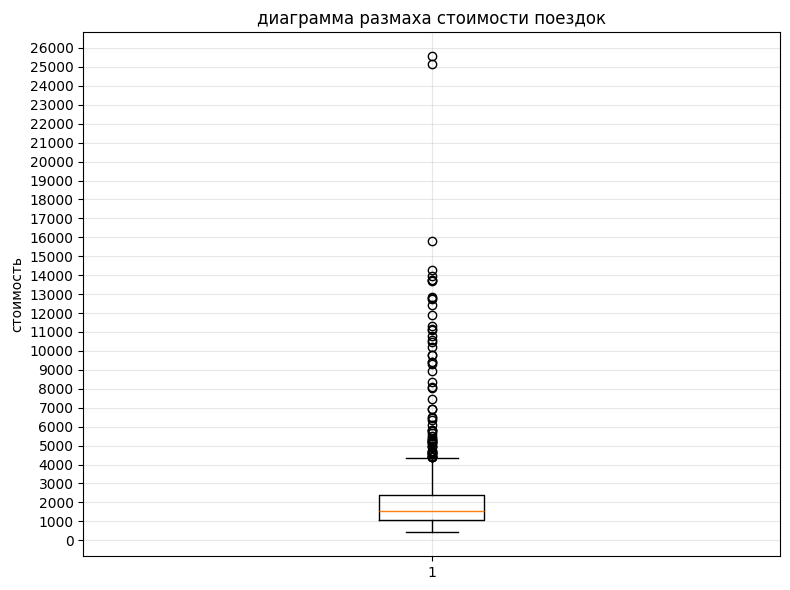

In [49]:
#строим простой boxplot для стоимости поездок с шагом 1000 по оси y
plt.figure(figsize=(8, 6))

#простой boxplot с помощью matplotlib
plt.boxplot(df_clean['price'], vert=True)
plt.title('диаграмма размаха стоимости поездок')
plt.ylabel('стоимость')

#устанавливаем метки на оси y через каждую 1000
max_price = df_clean['price'].max()
yticks = range(0, int(max_price) + 1000, 1000)
plt.yticks(yticks)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Анализ диаграммы размаха (boxplot) стоимости поездок показывает следующую картину. Медианная стоимость поездки составляет около 1500 рублей, при этом половина всех поездок находится в ценовом диапазоне от 1000 до 2500 рублей. Наблюдаются единичные дорогостоящие поездки-выбросы стоимостью свыше 5000 рублей. Распределение стоимости является скошенным вправо, что указывает на преобладание более дешевых поездок в общей структуре заказов.

**Пункт 8**

распределение поездок по ценовым уровням:
price_level
низкая     382
высокая    372
средняя    341
Name: count, dtype: int64


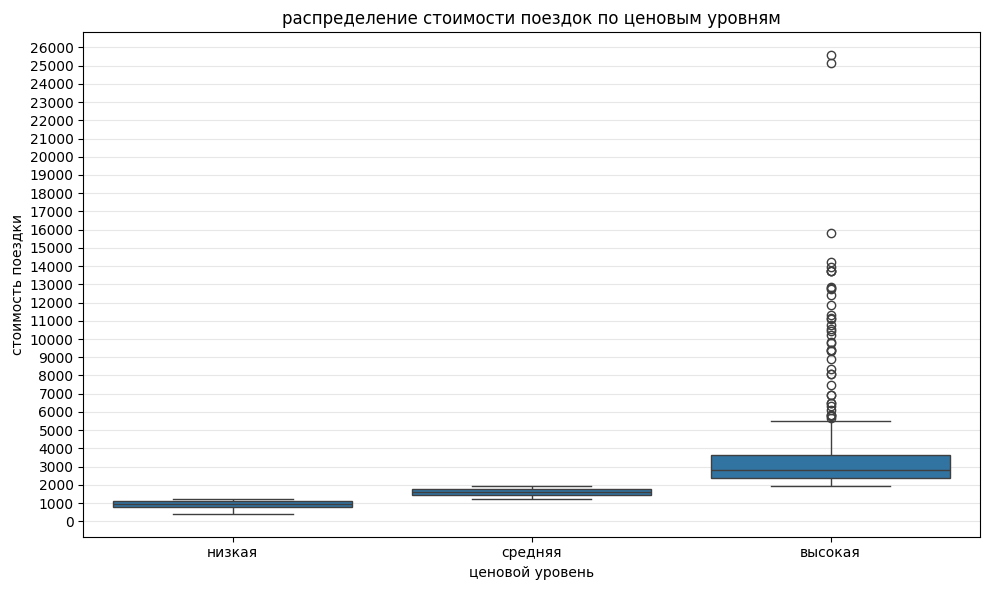

In [51]:
#создаем категории по стоимости поездок
price_33 = df_clean['price'].quantile(0.33)
price_66 = df_clean['price'].quantile(0.66)

df_clean['price_level'] = pd.cut(df_clean['price'], 
                               bins=[0, price_33, price_66, df_clean['price'].max()], 
                               labels=['низкая', 'средняя', 'высокая'])

print("распределение поездок по ценовым уровням:")
print(df_clean['price_level'].value_counts())

#строим boxplot стоимости поездок по ценовым уровням
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='price_level', y='price')
plt.title('распределение стоимости поездок по ценовым уровням')
plt.xlabel('ценовой уровень')
plt.ylabel('стоимость поездки')
plt.grid(True, alpha=0.3, axis='y')

#устанавливаем метки на оси y через каждую 1000
max_price = df_clean['price'].max()
yticks = range(0, int(max_price) + 1000, 1000)
plt.yticks(yticks)

plt.tight_layout()
plt.show()

Анализ boxplot по ценовым категориям показывает четкое разделение поездок на три группы. В категории "низкая" стоимость сосредоточена в компактном диапазоне с минимальным разбросом значений, что указывает на стандартизированные тарифы для бюджетных поездок. Категория "средняя" демонстрирует больший разброс стоимости, отражая разнообразие маршрутов средней ценовой категории. В группе "высокая" наблюдается наиболее широкий разброс значений с многочисленными выбросами, что характерно для премиальных и специализированных поездок.

**Пункт 9**

C:\Users\User\AppData\Local\Temp\ipykernel_11872\2638011181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='category', y='miles', palette='pastel')


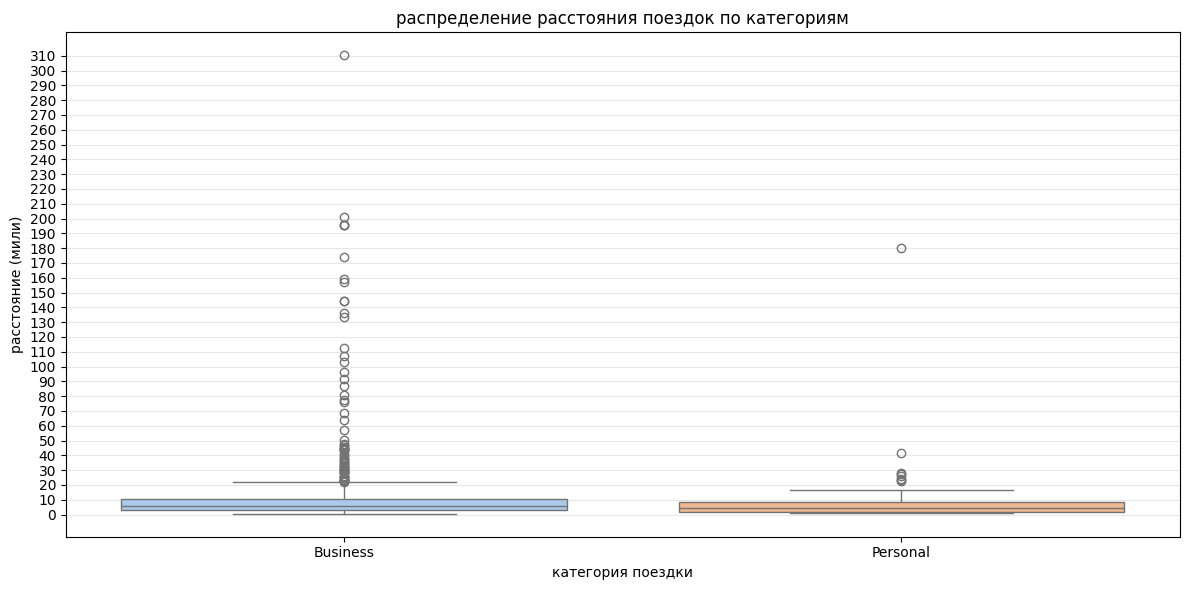

In [53]:
#первый boxplot: распределение расстояния по категориям поездок (seaborn)
plt.figure(figsize=(12, 6))

#используем seaborn для построения boxplot по категориям
sns.boxplot(data=df_clean, x='category', y='miles', palette='pastel')
plt.title('распределение расстояния поездок по категориям')
plt.xlabel('категория поездки')
plt.ylabel('расстояние (мили)')
plt.grid(True, alpha=0.3, axis='y')

#устанавливаем метки на оси y
max_miles = df_clean['miles'].max()
yticks = range(0, int(max_miles) + 10, 10)
plt.yticks(yticks)

plt.tight_layout()
plt.show()

Интерпретация распределения расстояния по категориям:

Анализ показывает значительную разницу в дистанциях между деловыми и личными поездками. Деловые поездки характеризуются более широким разбросом расстояний с наличием выбросов - длинных маршрутов свыше 50 миль. Личные поездки сосредоточены в компактном диапазоне до 20 миль, что отражает их локальный характер. Медианное расстояние деловых поездок превышает аналогичный показатель личных поездок, подтверждая более дальние маршруты в бизнес-сегменте.

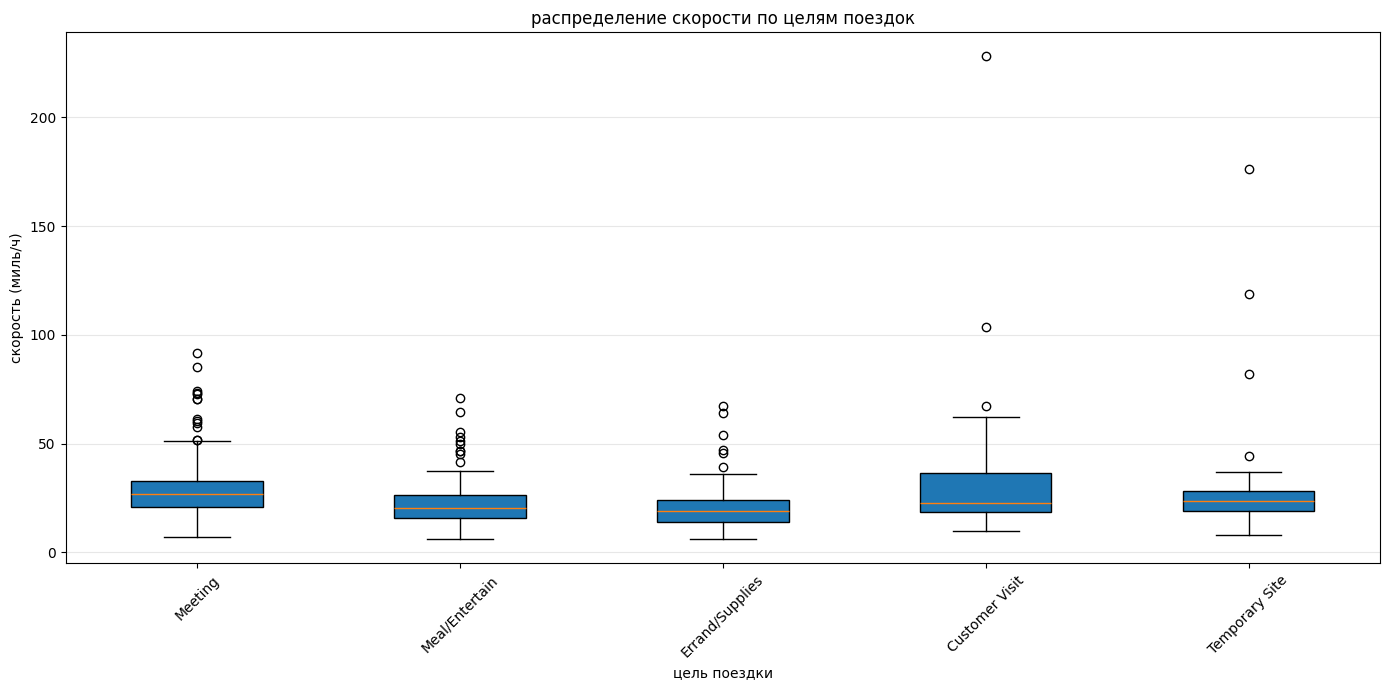

In [55]:
#второй boxplot: распределение скорости по целям поездок (matplotlib)
plt.figure(figsize=(14, 7))

#выбираем топ-5 самых частых целей поездок для наглядности
top_purposes = df_clean['purpose'].value_counts().head(5).index
df_top_purposes = df_clean[df_clean['purpose'].isin(top_purposes)]

#группируем данные по целям для построения boxplot matplotlib
data_to_plot = []
labels = []
for purpose in top_purposes:
    data_to_plot.append(df_top_purposes[df_top_purposes['purpose'] == purpose]['speed'].values)
    labels.append(purpose)

#строим boxplot с помощью matplotlib
plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
plt.title('распределение скорости по целям поездок')
plt.xlabel('цель поездки')
plt.ylabel('скорость (миль/ч)')
plt.grid(True, alpha=0.3, axis='y')

#настраиваем внешний вид
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


интерпретация распределения скорости по целям поездок:
анализ скоростных характеристик по целям поездок выявляет интересные закономерности. поездки с целью 'customer visit' демонстрируют наибольший разброс скоростей, что может связано с разнообразием маршрутов - от городских до междугородних. поездки 'meeting' и 'temporary site' имеют схожие профили скоростей, вероятно, отражая стандартные бизнес-маршруты. цели 'meal/entertain' и 'errand/supplies' показывают более низкие скорости, что соответствует городским поездкам в спокойной неформальной атмосфере. 

Проведенный исследовательский анализ данных о поездках такси позволил глубоко изучить структуру и закономерности в данных, полностью соответствуя методологии исследовательского анализа данных (EDA). Как подчеркивается в теоретической части, EDA является критически важным этапом, предшествующим применению статистических моделей, поскольку он позволяет понять данные, выявить закономерности и обнаружить аномалии. В ходе работы был успешно применен комплекс методов визуализации, включая гистограммы, диаграммы рассеяния и диаграммы размаха, которые доказали свою эффективность для выявления скрытых взаимосвязей в данных.

Анализ выявил ключевые закономерности в данных о поездках, подтвердив теоретическое положение о том, что визуализация данных является мощным инструментом EDA. С помощью матрицы диаграмм рассеяния была обнаружена сильная положительная корреляция между расстоянием и временем поездки (0.999), что соответствует теоретическому описанию корреляции как статистической меры зависимости между переменными. Диаграммы размаха эффективно показали распределение стоимости поездок по категориям, выявив выраженную положительную асимметрию и наличие выбросов, что полностью согласуется с описанием boxplot в методичке как инструмента для визуализации ключевых статистических показателей.

Практическая реализация анализа продемонстрировала эффективность методов визуализации. Использование различных библиотек визуализации (seaborn, matplotlib, pandas) позволило комплексно подойти к анализу данных. Группировка данных по категориям и создание новых признаков на основе числовых столбцов позволила провести сравнительный анализ распределений, что особенно ценно для понимания бизнес-процессов. Выявленные закономерности, такие как преобладание деловых поездок, их большая протяженность и стоимость по сравнению с личными поездками, предоставляют ценную информацию для оптимизации тарифной политики и управления транспортными услугами, подтверждая практическую значимость методов исследовательского анализа данных.